In [5]:
import pandas as pd 
import sys 
import os 
import importlib 
import talib as ta
import matplotlib.pyplot as plt
path = 'C:/Users/mulle/Documents/iCloudDrive/Documents/19. GITHUB/Crypto/data'

os.chdir(path)

# Import the module
sys.path.append('P:/6. DSMA/99. Thesis/Github/thesis/scripts')
import pipeline_crypto_prices
from pipeline_crypto_prices import get_prices
import camel
import sentiment_analyzer
importlib.reload(pipeline_crypto_prices)
importlib.reload(camel)
importlib.reload(sentiment_analyzer)

<module 'sentiment_analyzer' from 'P:\\6. DSMA/99. Thesis/Github/thesis/scripts\\sentiment_analyzer.py'>

In [24]:
btc = get_prices(start_date='2018-01-01')

Data for BTC-USD from 2018-01-01 to 2024-07-10 has been downloaded successfully


### Making Technical Indicators and Other 

In [104]:
btc_ta = btc.drop('Adj Close', axis=1).copy()

# Overlay
btc_ta['bb_upper'], btc_ta['bb_middle'], btc_ta['bb_lower'] = ta.BBANDS(btc_ta.Close, 20, 2)
btc_ta['SAR'] = ta.SAR(btc_ta.High, btc_ta.Low, acceleration=0.02, maximum=0.2)

# Oscillators
btc['Stochastic'] ta.STOCH(btc.High, btc_f.Low, btc_f.Close, 14, 14, 0, 3, 0.5)[1])


btc_ta.tail(5)

,Date,Open,High,Low,Close,Volume,Returns,bb_upper,bb_middle,bb_lower,SAR
2378,2024-07-05,57022.808594,57497.152344,53717.375000,56662.375000,55417544033,-0.005534,67696.617946,62333.377734,56970.137523,63637.238126
2379,2024-07-06,56659.074219,58472.546875,56038.960938,58303.539063,20610320577,0.028964,67171.095779,61916.602344,56662.108909,63240.443600
2380,2024-07-07,58239.429688,58371.121094,55793.324219,55849.109375,20553359505,-0.042097,66830.322105,61384.542969,55938.763833,62859.520856
2381,2024-07-08,55849.574219,58131.335938,54321.019531,56705.097656,39766159899,0.015327,66485.670835,60962.760547,55439.850259,62493.835022
2382,2024-07-09,56704.597656,58239.195313,56316.875000,58009.226563,27849512607,0.022998,65960.109044,60615.207031,55270.305018,62142.776621


In [127]:
# Make dataframe for all chart recognition 

charts = pd.DataFrame()
charts['Date'] = btc.Date
charts['CDL2CROWS'] = ta.CDL2CROWS(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDL3BLACKCROWS'] = ta.CDL3BLACKCROWS(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDL3INSIDE'] = ta.CDL3INSIDE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDL3LINESTRIKE'] = ta.CDL3LINESTRIKE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDL3OUTSIDE'] = ta.CDL3OUTSIDE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDL3STARSINSOUTH'] = ta.CDL3STARSINSOUTH(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDL3WHITESOLDIERS'] = ta.CDL3WHITESOLDIERS(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLABANDONEDBABY'] = ta.CDLABANDONEDBABY(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLADVANCEBLOCK'] = ta.CDLADVANCEBLOCK(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLBELTHOLD'] = ta.CDLBELTHOLD(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLBREAKAWAY'] = ta.CDLBREAKAWAY(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLCLOSINGMARUBOZU'] = ta.CDLCLOSINGMARUBOZU(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLCONCEALBABYSWALL'] = ta.CDLCONCEALBABYSWALL(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLCOUNTERATTACK'] = ta.CDLCOUNTERATTACK(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLDARKCLOUDCOVER'] = ta.CDLDARKCLOUDCOVER(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLDOJI'] = ta.CDLDOJI(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLDOJISTAR'] = ta.CDLDOJISTAR(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLDRAGONFLYDOJI'] = ta.CDLDRAGONFLYDOJI(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLENGULFING'] = ta.CDLENGULFING(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLEVENINGDOJISTAR'] = ta.CDLEVENINGDOJISTAR(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLEVENINGSTAR'] = ta.CDLEVENINGSTAR(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLGAPSIDESIDEWHITE'] = ta.CDLGAPSIDESIDEWHITE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLGRAVESTONEDOJI'] = ta.CDLGRAVESTONEDOJI(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHAMMER'] = ta.CDLHAMMER(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHANGINGMAN'] = ta.CDLHANGINGMAN(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHARAMI'] = ta.CDLHARAMI(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHARAMICROSS'] = ta.CDLHARAMICROSS(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHIGHWAVE'] = ta.CDLHIGHWAVE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHIKKAKE'] = ta.CDLHIKKAKE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHIKKAKEMOD'] = ta.CDLHIKKAKEMOD(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHOMINGPIGEON'] = ta.CDLHOMINGPIGEON(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLIDENTICAL3CROWS'] = ta.CDLIDENTICAL3CROWS(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLINNECK'] = ta.CDLINNECK(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLINVERTEDHAMMER'] = ta.CDLINVERTEDHAMMER(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLKICKING'] = ta.CDLKICKING(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLKICKINGBYLENGTH'] = ta.CDLKICKINGBYLENGTH(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLLADDERBOTTOM'] = ta.CDLLADDERBOTTOM(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLLONGLEGGEDDOJI'] = ta.CDLLONGLEGGEDDOJI(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLLONGLINE'] = ta.CDLLONGLINE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLMARUBOZU'] = ta.CDLMARUBOZU(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLMATCHINGLOW'] = ta.CDLMATCHINGLOW(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLMATHOLD'] = ta.CDLMATHOLD(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLMORNINGDOJISTAR'] = ta.CDLMORNINGDOJISTAR(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLMORNINGSTAR'] = ta.CDLMORNINGSTAR(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLONNECK'] = ta.CDLONNECK(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLPIERCING'] = ta.CDLPIERCING(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLRICKSHAWMAN'] = ta.CDLRICKSHAWMAN(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLRISEFALL3METHODS'] = ta.CDLRISEFALL3METHODS(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLSEPARATINGLINES'] = ta.CDLSEPARATINGLINES(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLSHOOTINGSTAR'] = ta.CDLSHOOTINGSTAR(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLSHORTLINE'] = ta.CDLSHORTLINE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLSPINNINGTOP'] = ta.CDLSPINNINGTOP(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLSTALLEDPATTERN'] = ta.CDLSTALLEDPATTERN(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLSTICKSANDWICH'] = ta.CDLSTICKSANDWICH(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLTAKURI'] = ta.CDLTAKURI(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLTASUKIGAP'] = ta.CDLTASUKIGAP(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLTHRUSTING'] = ta.CDLTHRUSTING(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLTRISTAR'] = ta.CDLTRISTAR(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLUNIQUE3RIVER'] = ta.CDLUNIQUE3RIVER(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLUPSIDEGAP2CROWS'] = ta.CDLUPSIDEGAP2CROWS(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLXSIDEGAP3METHODS'] = ta.CDLXSIDEGAP3METHODS(btc.Close, btc.Open, btc.High, btc.Low)

# Create a more compact representation of the dataframe
charts['Non_Zero_Columns'] = charts.apply(
    lambda row: [col for col in charts.columns if row[col] != 0 and col != 'Date'], axis=1
)

# Filter to only include rows with non-zero columns
charts = charts[charts['Non_Zero_Columns'].apply(len) > 0]

# Keep only the 'Date' and 'Non_Zero_Columns' columns
charts = charts[['Date', 'Non_Zero_Columns']]

charts

,Date,Non_Zero_Columns
10,2018-01-10,"[CDLBELTHOLD, CDLCLOSINGMARUBOZU, CDLMARUBOZU]"
11,2018-01-11,[CDLINVERTEDHAMMER]
14,2018-01-14,[CDLINVERTEDHAMMER]
16,2018-01-16,[CDLCLOSINGMARUBOZU]
17,2018-01-17,[CDLCLOSINGMARUBOZU]
...,...,...
2378,2024-07-05,[CDLCLOSINGMARUBOZU]
2379,2024-07-06,"[CDLBELTHOLD, CDLCLOSINGMARUBOZU, CDLLONGLINE,..."
2380,2024-07-07,[CDLINVERTEDHAMMER]
2381,2024-07-08,"[CDLBELTHOLD, CDLCLOSINGMARUBOZU, CDLMARUBOZU]"


In [107]:
START_DATE = '2024-10-07'
END_DATE = pd.Timestamp.now().date()
btc.Date  = pd.to_datetime(btc.Date)
btc_ta.Date  = pd.to_datetime(btc_ta.Date)

### Price Chart View

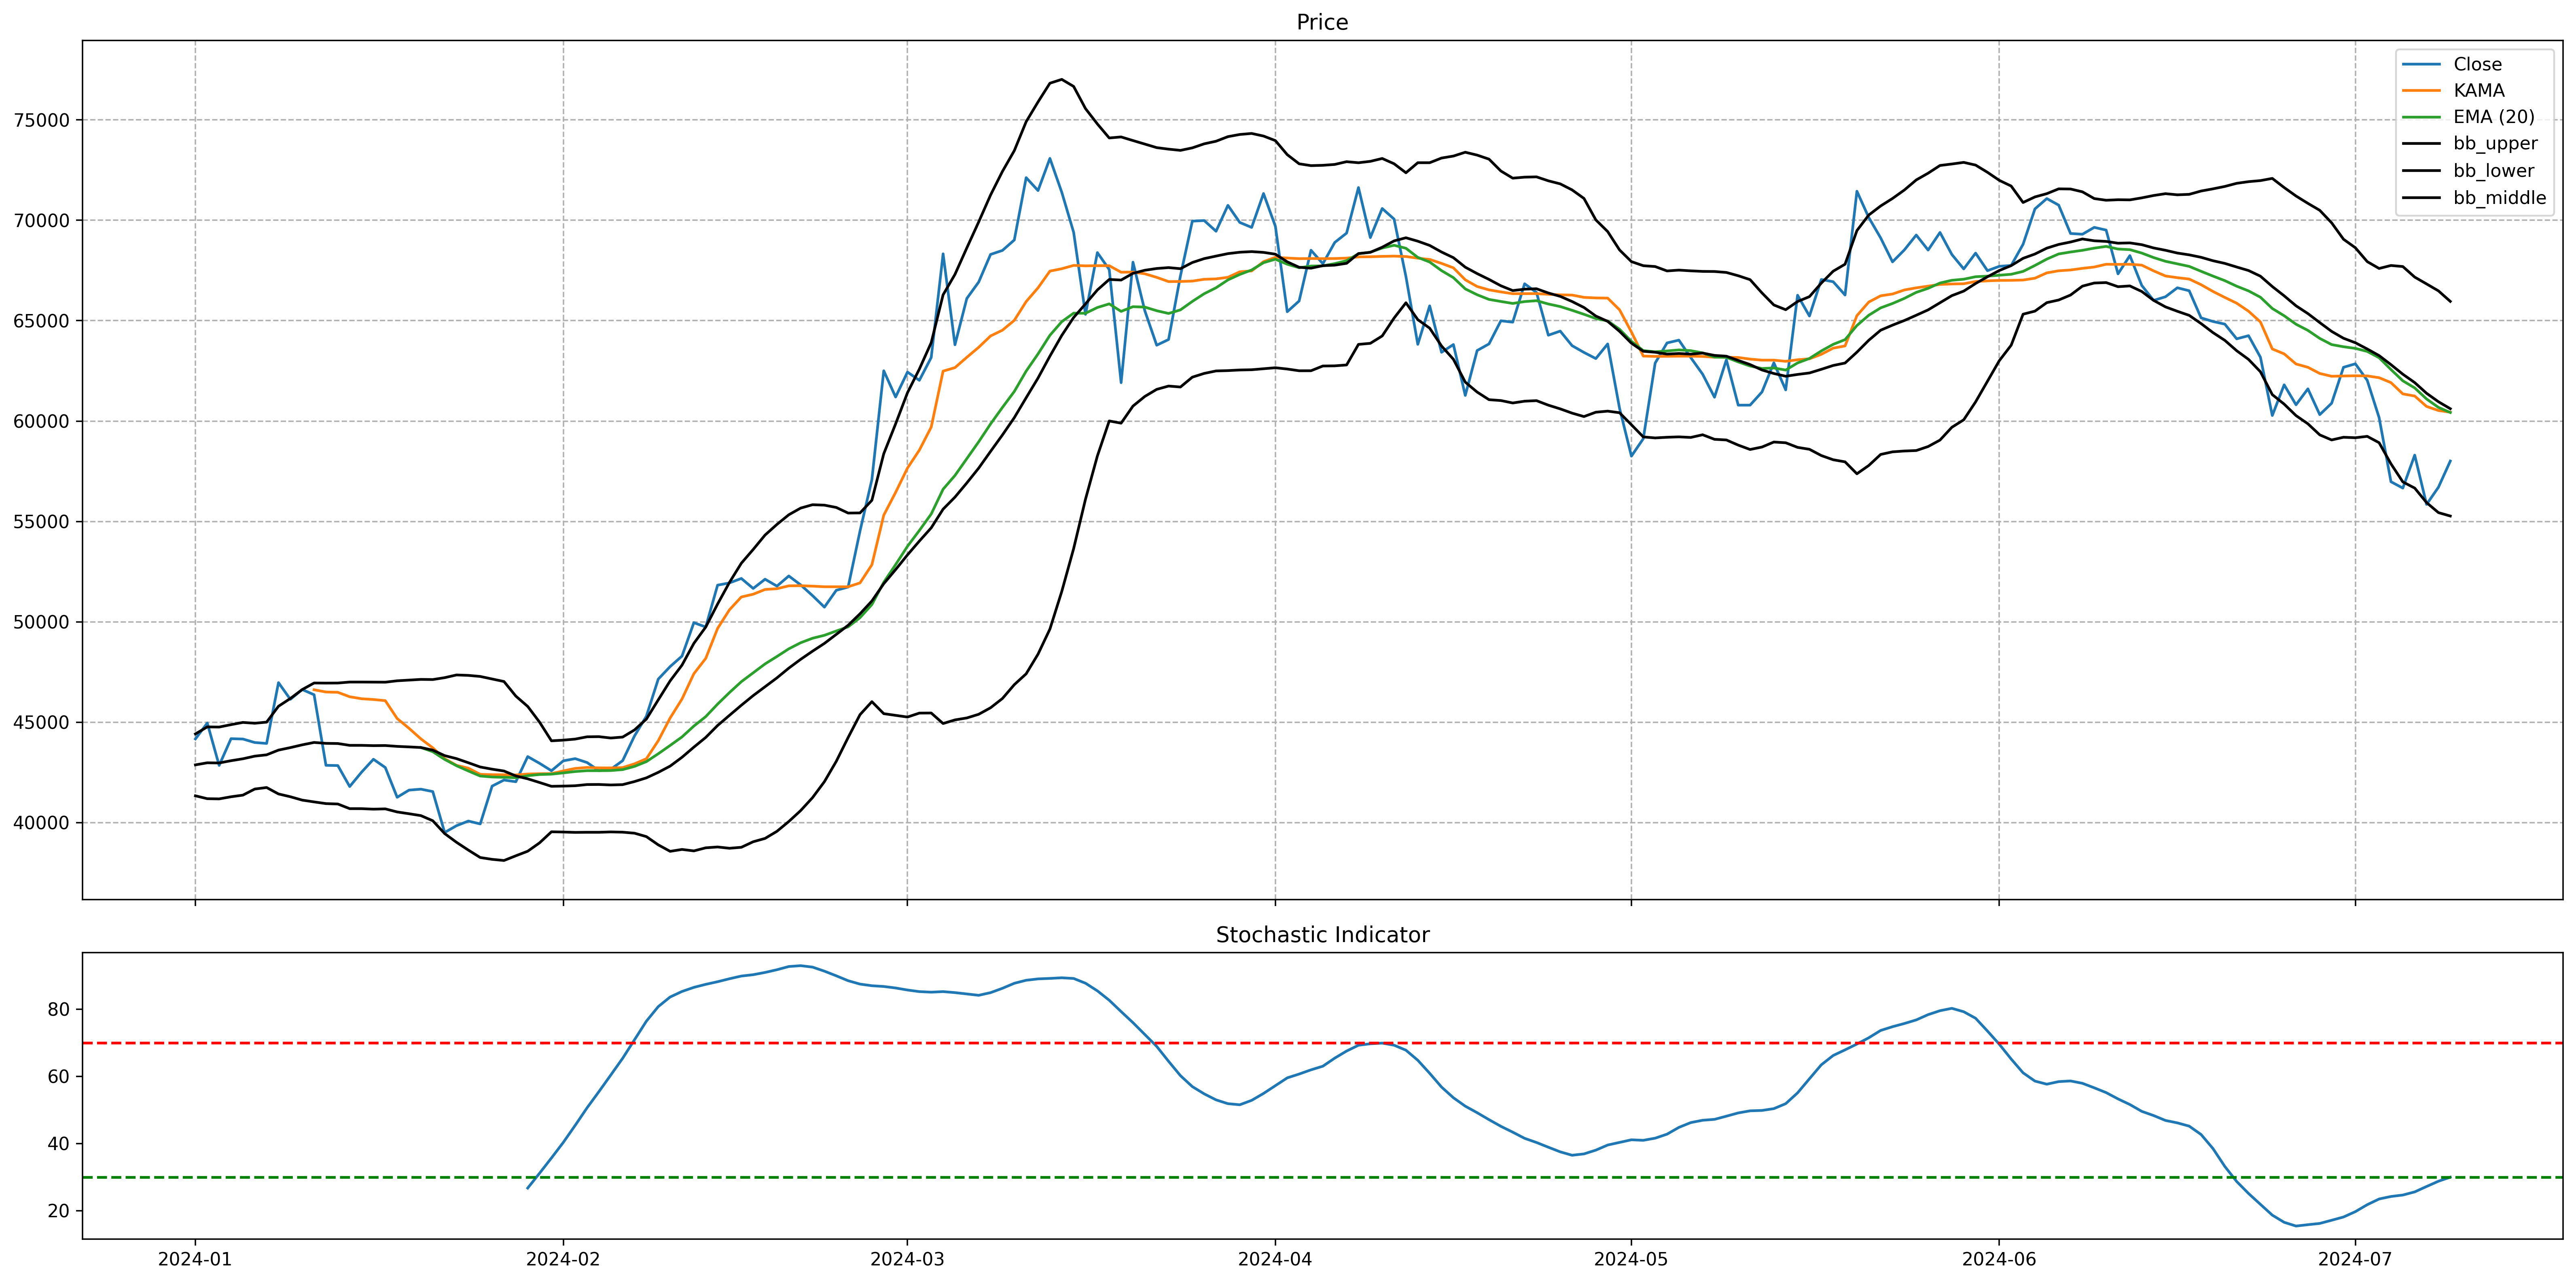

In [130]:
# Date range selection
btc_f = btc_ta[btc_ta.Date >= '2024-01-01']

fig, ax = plt.subplots(2, 1, figsize=(20,10), gridspec_kw={'height_ratios': [3, 1]}, dpi=320, sharex=True)
ax[0].plot(btc_f.Date, btc_f.Close)
ax[0].plot(btc_f.Date, ta.KAMA(btc_f.Close, 10))
ax[0].plot(btc_f.Date, ta.EMA(btc_f.Close, 20))
ax[0].plot(btc_f.Date, btc_f.bb_upper, color='black')
ax[0].plot(btc_f.Date, btc_f.bb_lower, color='black')
ax[0].plot(btc_f.Date, btc_f.bb_middle, color='black')
#ax[0].plot(btc_f.Date, btc_f.SAR)
ax[0].legend(['Close', 'KAMA','EMA (20)', 'bb_upper', 'bb_lower', 'bb_middle'])
ax[0].set_title('Price')
#ax2 = ax[0].twinx()
#ax2.plot(btc_f.Date, ta.MOM(btc_f.Close, 5), color='black')

#ax[1].plot(btc_f.Date, btc_f.Volume)
ax[1].plot(btc_f.Date, ta.STOCH(btc_f.High, btc_f.Low, btc_f.Close, 14, 14, 0, 3, 0.5)[1])
ax[1].axhline(y=70, color='red', linestyle='--')
ax[1].axhline(y=30, color='green', linestyle='--')
ax[1].set_title('Stochastic Indicator')
ax[0].grid(True, linestyle='--')

plt.tight_layout()

In [ ]:
ax[0].plot(btc_f.Date, btc_f.Close)
ax[0].plot(btc_f.Date, ta.KAMA(btc_f.Close, 10))
ax[0].plot(btc_f.Date, ta.EMA(btc_f.Close, 20))
ax[0].legend(['Close', 'KAMA','EMA (20)'])

ax[1].plot(btc_f.Date, btc_f.Volume)
ax[1].plot(btc_f.Date, ta.EMA(btc_f.Volume, 20)

plt.tight_layout()

In [ ]:
EMA(btc_f.Volume, 20)

plt.tight_layout()

In [53]:
ta.get_functions()

['HT_DCPERIOD',
 'HT_DCPHASE',
 'HT_PHASOR',
 'HT_SINE',
 'HT_TRENDMODE',
 'ADD',
 'DIV',
 'MAX',
 'MAXINDEX',
 'MIN',
 'MININDEX',
 'MINMAX',
 'MINMAXINDEX',
 'MULT',
 'SUB',
 'SUM',
 'ACOS',
 'ASIN',
 'ATAN',
 'CEIL',
 'COS',
 'COSH',
 'EXP',
 'FLOOR',
 'LN',
 'LOG10',
 'SIN',
 'SINH',
 'SQRT',
 'TAN',
 'TANH',
 'ADX',
 'ADXR',
 'APO',
 'AROON',
 'AROONOSC',
 'BOP',
 'CCI',
 'CMO',
 'DX',
 'MACD',
 'MACDEXT',
 'MACDFIX',
 'MFI',
 'MINUS_DI',
 'MINUS_DM',
 'MOM',
 'PLUS_DI',
 'PLUS_DM',
 'PPO',
 'ROC',
 'ROCP',
 'ROCR',
 'ROCR100',
 'RSI',
 'STOCH',
 'STOCHF',
 'STOCHRSI',
 'TRIX',
 'ULTOSC',
 'WILLR',
 'BBANDS',
 'DEMA',
 'EMA',
 'HT_TRENDLINE',
 'KAMA',
 'MA',
 'MAMA',
 'MAVP',
 'MIDPOINT',
 'MIDPRICE',
 'SAR',
 'SAREXT',
 'SMA',
 'T3',
 'TEMA',
 'TRIMA',
 'WMA',
 'CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',


In [122]:
?ta.CDL3BLACKCROWS

Signature: ta.CDL3BLACKCROWS(open, high, low, close)
Docstring:
CDL3BLACKCROWS(open, high, low, close)

Three Black Crows (Pattern Recognition)

Inputs:
    prices: ['open', 'high', 'low', 'close']
Outputs:
    integer (values are -100, 0 or 100)
Type:      function